# Virtual Kinetics Lab Reaction Software - Online Workshop

## Python Multiscape Thermodynamic Toolbox (pMuTT)


<a id='section_1'></a>

# 1. Introduction

<img src="images/pmutt_logo.png" width=400>

- Estimates thermochemical and kinetic parameters using statistical mechanics, transition state theory
- Writes input files for kinetic models and eases thermodynamic analysis
- Implemented in Python
  - Easy to learn
  - Heavily used in scientific community
  - Object-oriented approach is a natural analogy to chemical phenomenon
- Library approach allows users to define the starting point and end point

<img src="images/workflow.png" width=600>

<a id='section_1_1'></a>

<a id='section_2'></a>

# 2. Useful Links

## **[Documentation](https://vlachosgroup.github.io/pMuTT/)**

Find the most updated documentation.
<a href="https://vlachosgroup.github.io/pMuTT/"><img src="images/pmutt_doc.png" width=800></a>

## **[Issues](https://github.com/VlachosGroup/pmutt/issues)**

Report bugs, request features, and receive help.

<a href="https://github.com/VlachosGroup/pmutt/issues"><img src="images/pmutt_issues.png" width=800></a>

## **[Examples](https://vlachosgroup.github.io/pMuTT/examples.html)**

Run examples. Use Binder notebooks to try pMuTT before installing.
<a href="https://vlachosgroup.github.io/pMuTT/examples.html"><img src="images/pmutt_examples.png" width=800></a>


# References

- [A Python Multiscale Thermochemistry Toolbox (pMuTT) for thermochemical and kinetic parameter estimation; Lym, Wittreich, et al; Computer Physics Communications, 2020](https://scholar.google.com/scholar?oi=bibs&cluster=17816609206929175595&btnI=1&hl=en)
- [Python Group Additivity (pGrAdd) software for estimating species thermochemical properties; Wittreich, et al; Computer Physics Communications, 2022](https://scholar.google.com/scholar?oi=bibs&cluster=7963801704969122168&btnI=1&hl=en)
- [Microkinetic modeling of surface catalysis; Wittreich, et al; Handbook of Materials Modeling: Applications, 2020](https://scholar.google.com/scholar?oi=bibs&cluster=2412312200916247815&btnI=1&hl=en)

# 3. Creating statistical mechanical objects using StatMech

Molecules show translational, vibrational, rotational, electronic, and nuclear modes.

<img src="images/statmech_modes.png" width=800>

## 3.1. Supported StatMech modes

<img src="images/StatMech_smartart.png" width=300>

The StatMech object allows us to specify translational, vibrational, rotational, electronic and nuclear modes independently, which gives flexibility in what behavior you would like.

<img src="images/example_statmech.png" width=600>

Below are the available modes.

<a id='section_3_1_1'></a>

### 3.1.1. Translations
- [``FreeTrans``](https://vlachosgroup.github.io/pMuTT/statmech.html#freetrans) - Translations assuming no intermolecular interactions. Can be adjusted for 1, 2, or 3 degrees of translation.

<a id='section_3_1_2'></a>

### 3.1.2. Vibrations
- [``HarmonicVib``](https://vlachosgroup.github.io/pMuTT/statmech.html#harmonicvib) - Harmonic vibrations
- [``QRRHOVib``](https://vlachosgroup.github.io/pMuTT/statmech.html#harmonicvib) - Quasi rigid rotor harmonic oscillator. Low frequency modes are treated as rigid rotations.
- [``EinsteinVib``](https://vlachosgroup.github.io/pMuTT/statmech.html#einsteinvib) - Each atom in the crystal vibrates as independent 3D harmonic oscillators
- [``DebyeVib``](https://vlachosgroup.github.io/pMuTT/statmech.html#debyevib) - Improves upon ``EinsteinVib`` by considering simultaneous vibrations. Improves accuracy at lower temperatures.

<a id='section_3_1_3'></a>

### 3.1.3. Rotations
- [``RigidRotor``](https://vlachosgroup.github.io/pMuTT/statmech.html#rigidrotor) - Molecule can be rotated with no change in bond properties

<a id='section_3_1_4'></a>

### 3.1.4. Electronic
- [``GroundStateElec``](https://vlachosgroup.github.io/pMuTT/statmech.html#groundstateelec) - Electronic ground state of the system
- [``LSR``](https://vlachosgroup.github.io/pMuTT/statmech.html#linear-scaling-relationships-lsrs) - Linear Scaling Relationship to estimate binding energies using reference adsorbate

<a id='section_3_1_5'></a>

### 3.1.5. Miscellaneous
- [``EmptyMode``](https://vlachosgroup.github.io/pMuTT/statmech.html#empty-mode) - Default mode if not specified. Does not contribute to any properties
- [``ConstantMode``](https://vlachosgroup.github.io/pMuTT/statmech.html#constant-mode) - Specify arbitrary values to thermodynamic quantities

Using a ``StatMech`` mode gives you access to all the common thermodynamic properties.

<img src="images/StatMech_obj.png" width=400>

For this example, we will use a hydrogen molecule as an ideal gas:
- translations with no interaction between molecules
- harmonic vibrations
- rigid rotor rotations
- ground state electronic structure
- no contribution from nuclear modes.

<img src="images/H2_1.jpg" width=200>

<a id='section_3_2'></a>

## 3.2. Initializing StatMech modes individually

First, we will create an ASE Atoms object of H2. This will make it easier to initialize translations and rotations.

In [1]:
from ase.build import molecule
from ase.visualize import view

H2_atoms = molecule('H2')
# view(H2_atoms, viewer='x3d')

Now we will initialize each mode separately

In [2]:
from pmutt.statmech import StatMech, trans, vib, rot, elec

'''Translational'''
H2_trans = trans.FreeTrans(n_degrees=3, atoms=H2_atoms)

'''Vibrational'''
H2_vib = vib.HarmonicVib(vib_wavenumbers=[4342.]) # vib_wavenumbers in cm-1

'''Rotational'''
H2_rot = rot.RigidRotor(symmetrynumber=2, atoms=H2_atoms)

'''Electronic'''
H2_elec = elec.GroundStateElec(potentialenergy=-0.359, spin=0) # potentialenergy in eV

'''StatMech Initialization'''
H2_statmech = StatMech(name='H2',
                       trans_model=H2_trans,
                       vib_model=H2_vib,
                       rot_model=H2_rot,
                       elec_model=H2_elec)

'''Calculate thermodynamic properties per mole basis'''
H_statmech = H2_statmech.get_H(T=298., units='kJ/mol')
S_statmech = H2_statmech.get_S(T=298., units='cal/mol/K')
print('H_H2(T=298 K) = {:.1f} kJ/mol'.format(H_statmech))
print('S_H2(T=298 K) = {:.2f} cal/mol/K'.format(S_statmech))

H_H2(T=298 K) = 0.0 kJ/mol
S_H2(T=298 K) = 31.13 cal/mol/K


If you specify the composition of your species, you can calculate per mass quantities too.

In [3]:
'''Input composition'''
H2_statmech.elements = {'H': 2}

'''Calculate thermodynamic properties per mass basis'''
H_statmech = H2_statmech.get_H(T=298., units='kJ/g')
S_statmech = H2_statmech.get_S(T=298., units='J/g/K')
print('H_H2(T=298 K) = {:.1f} kJ/g'.format(H_statmech))
print('S_H2(T=298 K) = {:.2f} J/g/K'.format(S_statmech))

H_H2(T=298 K) = 0.0 kJ/g
S_H2(T=298 K) = 64.60 J/g/K


<a id='section_3_3'></a>

## 3.3. Initializing StatMech modes using presets

Commonly used models can be accessed via [``presets``](https://vlachosgroup.github.io/pMuTT/statmech.html#presets). The currently supported models are:

- [``idealgas``](https://vlachosgroup.github.io/pMuTT/statmech.html#ideal-gas-idealgas) - Ideal gases
- [``harmonic``](https://vlachosgroup.github.io/pMuTT/statmech.html#harmonic-approximation-harmonic) - Typical for surface species
- [``electronic``](https://vlachosgroup.github.io/pMuTT/statmech.html#electronic-electronic) - Only has electronic modes
- [``placeholder``](https://vlachosgroup.github.io/pMuTT/statmech.html#placeholder-placeholder) - No contribution to any property
- [``constant``](https://vlachosgroup.github.io/pMuTT/statmech.html#constant-constant) - Use arbitrary constants to thermodynamic properties


In [4]:
from ase.build import molecule
from pmutt.statmech import StatMech, presets

H2_statmech = StatMech(atoms=molecule('H2'),
                       vib_wavenumbers=[4342.], # cm-1
                       symmetrynumber=2,
                       potentialenergy=-0.359, # eV
                       spin=0.,
                       **presets['idealgas'])

'''Calculate thermodynamic properties'''
H_statmech = H2_statmech.get_H(T=298., units='kJ/mol')
S_statmech = H2_statmech.get_S(T=298., units='J/mol/K')
print('H_H2(T=298 K) = {:.1f} kJ/mol'.format(H_statmech))
print('S_H2(T=298 K) = {:.2f} J/mol/K'.format(S_statmech))

H_H2(T=298 K) = 0.0 kJ/mol
S_H2(T=298 K) = 130.23 J/mol/K


<a id='section_4'></a>

# 4. Creating empirical objects
Empirical objects are useful for kinetic models because they can be evaluated quickly compared to statistical mechanical equations. They are typically polynomials that provide Cp, H, and S at a given T.

Currently, pMuTT supports

- [NASA polynomials](https://vlachosgroup.github.io/pMuTT/empirical.html#nasa)
- [NASA9 polynomials](https://vlachosgroup.github.io/pMuTT/empirical.html#nasa9)
- [Shomate polynomials](https://vlachosgroup.github.io/pMuTT/empirical.html#shomate). 

They can be initialized in three ways:
- inputting the polynomials directly
- from another model (e.g. ``StatMech``, ``Shomate``) using (``from_model``)
- from heat capacity, enthalpy and entropy data using (``from_data``)

<img src="images/nasa_func1.png" width=400>

<a id='section_4_1'></a>

## 4.1. Inputting a NASA polynomial directly

The H2 NASA polynomial from the [Burcat database](http://combustion.berkeley.edu/gri_mech/version30/files30/thermo30.dat) is represented as:

```
H2                TPIS78H   2               G   200.000  3500.000  1000.000    1
 3.33727920E+00-4.94024731E-05 4.99456778E-07-1.79566394E-10 2.00255376E-14    2
-9.50158922E+02-3.20502331E+00 2.34433112E+00 7.98052075E-03-1.94781510E-05    3
 2.01572094E-08-7.37611761E-12-9.17935173E+02 6.83010238E-01                   4
```

This can be translated to pMuTT syntax using:

H_H2(T=298 K) = -0.0010337769809013993 kcal/mol


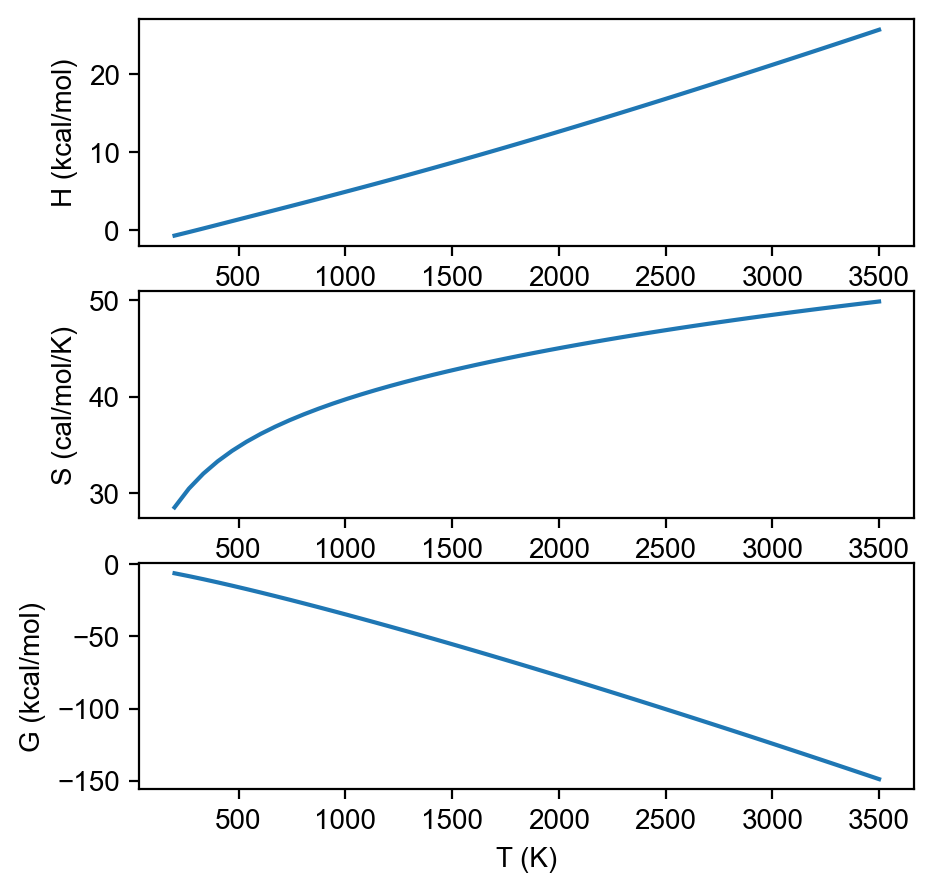

In [5]:
import numpy as np
from matplotlib import pyplot as plt

from pmutt import plot_1D
from pmutt.empirical.nasa import Nasa

# Initialize NASA polynomial
H2_nasa = Nasa(name='H2',
               elements={'H': 2},
               phase='G',
               T_low=200., T_mid=1000., T_high=3500.,
               a_low=[2.34433112E+00, 7.98052075E-03, -1.94781510E-05,
                      2.01572094E-08, -7.37611761E-12, -9.17935173E+02,
                      6.83010238E-01],
               a_high=[3.33727920E+00, -4.94024731E-05, 4.99456778E-07,
                       -1.79566394E-10, 2.00255376E-14, -9.50158922E+02,
                       -3.20502331E+00])

# Calculate thermodynamic quantities using the same syntax as StatMech
H_H2 = H2_nasa.get_H(units='kcal/mol', T=298.)
print('H_H2(T=298 K) = {} kcal/mol'.format(H_H2))

# Show thermodynamic quantities vs. T
T = np.linspace(200., 3500.)
f2, ax2 = plot_1D(H2_nasa,
                  x_name='T', x_values=T,
                  methods=('get_H', 'get_S', 'get_G'),
                  get_H_kwargs={'units': 'kcal/mol'},
                  get_S_kwargs={'units': 'cal/mol/K'},
                  get_G_kwargs={'units': 'kcal/mol'})

# Modifying figure
ax2[0].set_ylabel('H (kcal/mol)')
ax2[1].set_ylabel('S (cal/mol/K)')
ax2[2].set_ylabel('G (kcal/mol)')
ax2[2].set_xlabel('T (K)')
f2.set_size_inches(5, 5)
f2.set_dpi(200)
plt.show()

<a id='section_4_2'></a>

## 4.2. Fitting an empirical object to a StatMech object
Empirical objects can be made directly any species objects using the ``from_model`` method. Below, we will create Nasa objects.

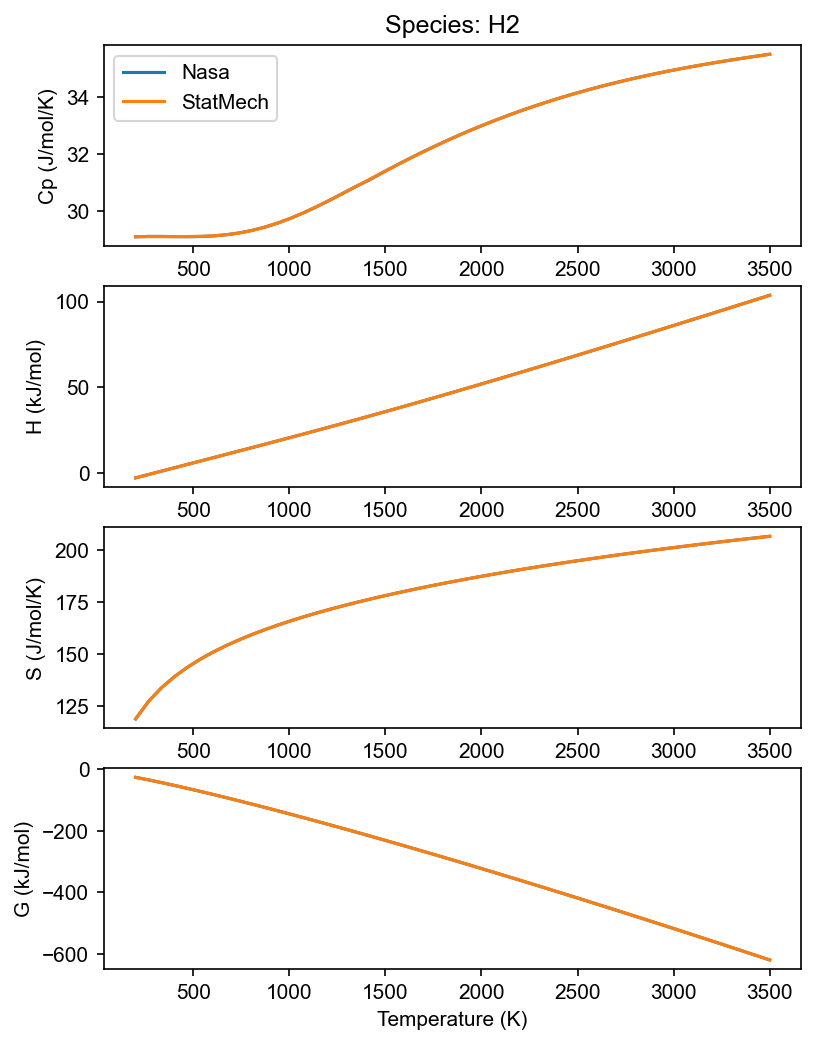

In [6]:
H2_nasa = Nasa.from_model(name='H2',
                          T_low=200.,
                          T_high=3500.,
                          model=H2_statmech)
# Compare the statistical mechanical model to the empirical model
f3, ax3 = H2_nasa.plot_statmech_and_empirical(Cp_units='J/mol/K',
                                              H_units='kJ/mol',
                                              S_units='J/mol/K',
                                              G_units='kJ/mol')
f3.set_size_inches(6, 8)
f3.set_dpi(150)
plt.show()

[ 2.90535154e+01  8.98047873e-01 -3.06778759e+00  2.96206594e+00
 -1.62592271e-03 -8.67744728e+00  1.65236561e+02 -8.97611422e-03]


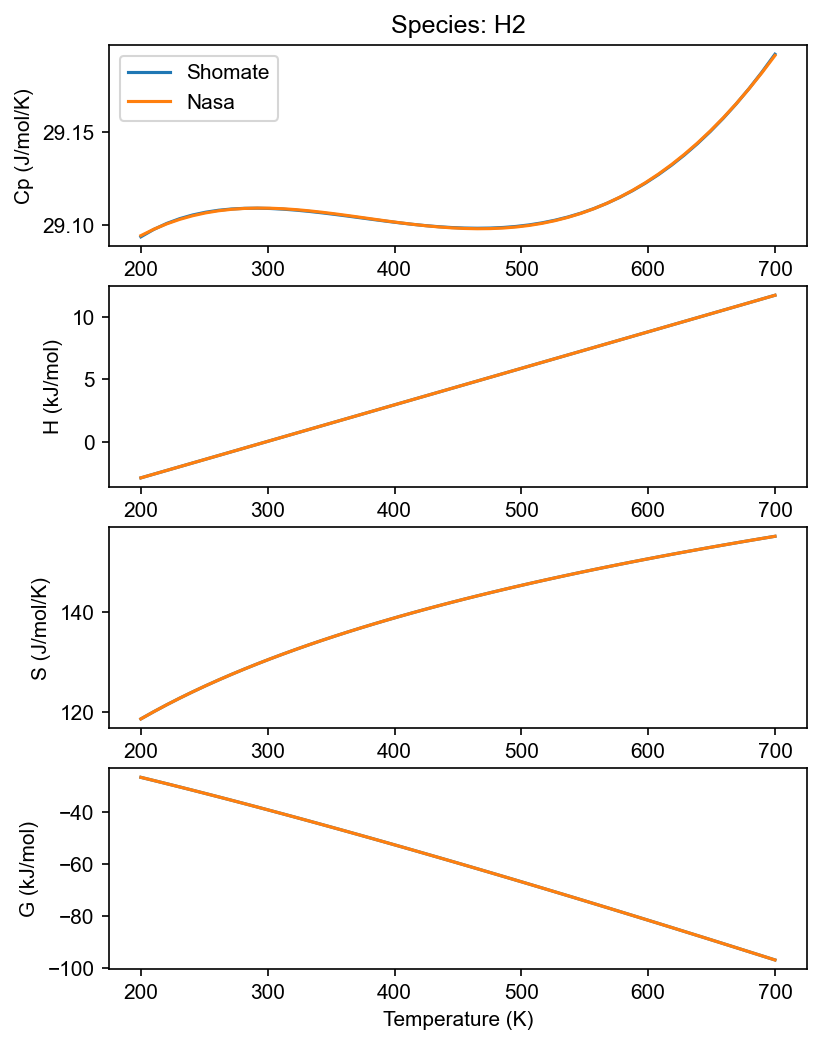

In [7]:
from pmutt.empirical.shomate import Shomate

H2_shomate = Shomate.from_model(model=H2_nasa, T_high=700.)
print(H2_shomate.a)

# Compare the statistical mechanical model to the empirical model
f3, ax3 = H2_shomate.plot_statmech_and_empirical(Cp_units='J/mol/K',
                                                 H_units='kJ/mol',
                                                 S_units='J/mol/K',
                                                 G_units='kJ/mol')
f3.set_size_inches(6, 8)
f3.set_dpi(150)
plt.show()

The ``Shomate`` is a simpler polynomial than the ``Nasa`` polynomial so it does not capture the features as well for the large T range. It is always a good idea to check your fit.

<a id='section_5'></a>

# 5. Input/Output
pMuTT has more IO functionality than below. See this page for [supported IO functions](https://vlachosgroup.github.io/pMuTT/io.html).

<a id='section_5_1'></a>

## 5.1. Input via Excel

Encoding each object in Python can be tedious. You can read several species from Excel spreadsheets using [``pmutt.io.excel.read_excel``](https://vlachosgroup.github.io/pmutt/io.html?highlight=read_excel#pmutt.io.excel.read_excel). Note that this function returns a list of dictionaries. This output allows you to initialize whichever object you want using kwargs syntax. There are also [special rules that depend on the header name](https://vlachosgroup.github.io/pMuTT/io.html#special-rules).

Below, we show an example importing species data from a spreadsheet and creating a series of NASA polynomials.

First, we ensure that the current working directory is the same as the notebook so we can access the spreadsheet.

In [8]:
import os
from pathlib import Path

# Find the location of Jupyter notebook
# Note that normally Python scripts have a __file__ variable but Jupyter notebook doesn't.
# Using pathlib can overcome this limiation
notebook_folder = Path().resolve()
os.chdir(notebook_folder)

Now we can read from the spreadsheet.

In [9]:
from pprint import pprint
from pmutt.io.excel import read_excel

ab_initio_data = read_excel(io='./input/NH3_Input_Data.xlsx', sheet_name='species')

Below, we print one entry of the spreadsheet to show how pMuTT has processed it.

In [10]:
pprint(ab_initio_data[0])

{'atoms': Atoms(symbols='N2', pbc=True, cell=[20.0, 20.0, 21.12998]),
 'elec_model': <class 'pmutt.statmech.elec.GroundStateElec'>,
 'elements': {'N': 2.0},
 'model': <class 'pmutt.statmech.StatMech'>,
 'n_degrees': 3,
 'name': 'N2',
 'optional': 'atoms',
 'phase': 'gas',
 'potentialenergy': -16.63,
 'required': ('molecular_weight',
              'vib_wavenumbers',
              'potentialenergy',
              'spin',
              'geometry',
              'rot_temperatures',
              'symmetrynumber'),
 'rot_model': <class 'pmutt.statmech.rot.RigidRotor'>,
 'symmetrynumber': 2.0,
 'trans_model': <class 'pmutt.statmech.trans.FreeTrans'>,
 'vib_model': <class 'pmutt.statmech.vib.HarmonicVib'>,
 'vib_wavenumbers': [2744.0]}


After the data is read, we can fit the ``Nasa`` objects from the statistical mechanical data.

In [11]:
from pmutt.empirical.nasa import Nasa

# Create NASA polynomials using **kwargs syntax
nasa_species = []
for species_data in ab_initio_data:
    single_nasa_species = Nasa.from_model(T_low=100.,
                                          T_high=1500.,
                                          **species_data)
    nasa_species.append(single_nasa_species)

Just to ensure the species were read correctly, we can try printing out thermodynamic values.

In [12]:
T = 298. # K

# Print header
print('Row #   Name         H (kcal/mol)   S (cal/mol/K)   G (kcal/mol)')

# Print thermodynamic data of each species
for i, single_nasa_species in enumerate(nasa_species, start=3):
    H = single_nasa_species.get_H(T=T, units='kcal/mol')
    S = single_nasa_species.get_S(T=T, units='cal/mol/K')
    G = single_nasa_species.get_G(T=T, units='kcal/mol')
    
    print(('{:5d}   {:10}   {: 6.2f}        {: 6.2f}           {: 6.2f}'
           ''.format(i, single_nasa_species.name, H, S, G)))

Row #   Name         H (kcal/mol)   S (cal/mol/K)   G (kcal/mol)
    3   N2           -377.50         45.90           -391.18
    4   NH3          -434.06         45.98           -447.77
    5   H2           -147.84         31.13           -157.12
    6   N2(T)        -391.06         13.61           -395.11
    7   N(T)         -210.31          4.17           -211.55
    8   H(T)         -88.82          0.92           -89.10
    9   NH3(T)       -445.82         13.32           -449.78
   10   NH2(T)       -365.46          5.93           -367.22
   11   NH(T)        -295.15          3.00           -296.05
   12   TS1_NH3(T)   -423.00          8.35           -425.49
   13   TS2_NH2(T)   -353.71          4.50           -355.05
   14   TS3_NH(T)    -270.29          4.22           -271.55
   15   TS4_N2(T)    -334.64          6.67           -336.63
   16   RU(T)          0.00          0.00             0.00
   17   N2(S)        -395.78          5.27           -397.35
   18   N(S)         -21

<a id='section_6'></a>

# 6. Reactions

``Reaction`` objects can be created by putting together ``Nasa``, ``Nasa9``, ``Shomate`` and ``StatMech`` objects.
<img src="images/reaction_smartart.png" width=300>

<img src="images/reaction.png" width=600>

<img src="images/reaction_capabilities3.svg" width=800>

<a id='section_6_1'></a>

## 6.1. Initializing Reaction objects using from_string

The ``from_string`` method is the easiest way to create a ``Reaction`` object. It requires the relevant species to be in a dictionary and a string to describe the reaction.

<img src="images/reaction_string2.png" width=800>

We will demonstrate its use for the formation of NH$_3$ .

In [13]:
from pmutt.reaction import Reaction
from pmutt.io.thermdat import read_thermdat

# Create species. Note that you can mix different types of species

species = read_thermdat('./output/thermdat', 'dict')
# Define the formation of ammonia reaction
rxn1 = Reaction.from_string('1.5H2 + 0.5N2 = NH3', species)

Now we can calculate thermodynamic properties of the reaction.

In [14]:
'''Forward change in enthalpy'''
H_rxn_fwd = rxn1.get_delta_H(units='kcal/mol', T=300.)
print('Delta H_fwd(T = 300 K) = {:.1f} kcal/mol'.format(H_rxn_fwd))

'''Reverse change in entropy'''
S_rxn_rev = rxn1.get_delta_S(units='cal/mol/K', T=300., rev=True)
print('Delta S_rev(T = 300 K) = {:.1f} cal/mol/K'.format(S_rxn_rev))

'''Gibbs energy of reactants'''
G_react = rxn1.get_G_state(units='kcal/mol', T=300., state='reactants')
print('G_reactants(T = 300 K) = {:.1f} kcal/mol'.format(G_react))

Delta H_fwd(T = 300 K) = -15.6 kcal/mol
Delta S_rev(T = 300 K) = 23.0 cal/mol/K
G_reactants(T = 300 K) = -431.4 kcal/mol


We can now do the same for a surface elementary reaction with transition state information.

In [15]:
rxn2 = Reaction.from_string('NH(S) + H(S) = TS2_NH2(S) = NH2(S)', species)

'''Forward change in enthalpy'''
H_rxn_fwd = rxn2.get_delta_H(units='kcal/mol', T=300.)
print('Delta H_fwd(T = 300 K) = {:.1f} kcal/mol'.format(H_rxn_fwd))

'''Reverse change in entropy'''
S_rxn_rev = rxn2.get_delta_S(units='cal/mol/K', T=300., rev=True)
print('Delta S_rev(T = 300 K) = {:.1f} cal/mol/K'.format(S_rxn_rev))

'''Activation energy of reaction'''
H_act = rxn2.get_H_act(units='eV', T=300.)
print('Activation Energy(T = 300 K) = {:.1f} eV'.format(H_act))

'''Pre-exponential factor of reaction (Ratio partition function)'''
Pre_exp = rxn2.get_A(T=300., use_q=True)
print('Pre-exponential Factor(T = 300 K, Ratio partition function) = {:e}'.format(Pre_exp))

'''Pre-exponential factor of reaction (Delta Entropy of TS)'''
Pre_exp = rxn2.get_A(T=300., use_q=False)
print('Pre-exponential Factor(T = 300 K, \u0394Entropy TS) = {:e}'.format(Pre_exp))

Delta H_fwd(T = 300 K) = 23.0 kcal/mol
Delta S_rev(T = 300 K) = -8.3 cal/mol/K
Activation Energy(T = 300 K) = 1.5 eV
Pre-exponential Factor(T = 300 K, Ratio partition function) = 6.250984e+12
Pre-exponential Factor(T = 300 K, ΔEntropy TS) = 2.584885e+14


## 7. Other pMuTT's Capabilities
### Reaction Coordinate Diagrams

See the thermodynamic and kinetic feasibility of reaction mechanisms.

<img src="images/rxn_coordinate_diagram.png" width=700>

### Ab-Initio Phase Diagrams

Predict the most stable configuration with respect to temperature and pressure.

**Configurations**
<img src="images/configurations2.svg" width=800>
Typically we would consider more configurations than this.

**1D Phase Diagram**
<img src="images/Heatmap_1d.svg" width=400>

**2D Phase Diagram**
<img src="images/Heatmap_2d.png" width=400>

**Equilibrium Calculation**

network = {'CH3CH2CH3': 1, 'H2O': 0.7, 'H2': 0, 'CH2CHCH3': 0, 'CH4': 0,
           'CHCH': 0, 'CH2CH2': 0, 'CH3CH3': 0, 'CO2': 0, 'CO': 0}

<img src="images/Equilibrium.jpg" width=800>